# IDS CASE Study 
* Nivas - HU22CSEN0101720
* Jayanth - HU22CSEN0101734
* Vithesh - HU22CSEN0101557
* Jaswanth - HU22CSEN0100820
* Praneeth - HU22CSEN0100261
* Hemanth - HU22CSEN0100565
* Swaran - HU22CSEN0100345

## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('datasets/Adidas US Sales Datasets_2021.xlsx',header = 4)
df.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,West Gear,1128299.0,2021-01-01,West,California,San Francisco,Men's Athletic Footwear,65.0,750.0,487500.0,121875.0,0.25,Outlet
1,West Gear,1128299.0,2021-01-02,West,California,San Francisco,Women's Street Footwear,65.0,750.0,487500.0,42875.0,0.40,Outlet
2,West Gear,1128299.0,2021-01-03,West,California,San Francisco,Women's Athletic Footwear,60.0,650.0,390000.0,42875.0,0.35,Outlet
3,West Gear,1128299.0,2021-01-04,West,California,San Francisco,Men's Apparel,65.0,550.0,357500.0,42875.0,0.55,Outlet
4,West Gear,1128299.0,2021-01-05,West,California,San Francisco,Women's Apparel,80.0,725.0,580000.0,42875.0,0.20,Outlet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9483 entries, 0 to 9482
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          8346 non-null   object        
 1   Retailer ID       8346 non-null   float64       
 2   Invoice Date      8346 non-null   datetime64[ns]
 3   Region            8346 non-null   object        
 4   State             8346 non-null   object        
 5   City              8346 non-null   object        
 6   Product           8346 non-null   object        
 7   Price per Unit    8346 non-null   float64       
 8   Units Sold        8346 non-null   float64       
 9   Total Sales       8346 non-null   float64       
 10  Operating Profit  8346 non-null   float64       
 11  Operating Margin  8346 non-null   float64       
 12  Sales Method      8346 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 963.2+ KB


## Data Cleaning & Descriptive Statistics

In [4]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,West Gear,1128299.0,2021-01-01,West,California,San Francisco,Men's Athletic Footwear,65.0,750.0,487500.0,121875.0,0.25,Outlet
1,West Gear,1128299.0,2021-01-02,West,California,San Francisco,Women's Street Footwear,65.0,750.0,487500.0,42875.0,0.40,Outlet
2,West Gear,1128299.0,2021-01-03,West,California,San Francisco,Women's Athletic Footwear,60.0,650.0,390000.0,42875.0,0.35,Outlet
3,West Gear,1128299.0,2021-01-04,West,California,San Francisco,Men's Apparel,65.0,550.0,357500.0,42875.0,0.55,Outlet
4,West Gear,1128299.0,2021-01-05,West,California,San Francisco,Women's Apparel,80.0,725.0,580000.0,42875.0,0.20,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9478,Foot Locker,1185732.0,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,0.28,Outlet
9479,Foot Locker,1185732.0,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,0.32,Outlet
9480,Foot Locker,1185732.0,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,0.37,Outlet
9481,Foot Locker,1185732.0,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,0.42,Outlet


In [5]:
df = df.iloc[:,1:]
df

,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,1128299.0,2021-01-01,West,California,San Francisco,Men's Athletic Footwear,65.0,750.0,487500.0,121875.0,0.25,Outlet
1,1128299.0,2021-01-02,West,California,San Francisco,Women's Street Footwear,65.0,750.0,487500.0,42875.0,0.40,Outlet
2,1128299.0,2021-01-03,West,California,San Francisco,Women's Athletic Footwear,60.0,650.0,390000.0,42875.0,0.35,Outlet
3,1128299.0,2021-01-04,West,California,San Francisco,Men's Apparel,65.0,550.0,357500.0,42875.0,0.55,Outlet
4,1128299.0,2021-01-05,West,California,San Francisco,Women's Apparel,80.0,725.0,580000.0,42875.0,0.20,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9478,1185732.0,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,0.28,Outlet
9479,1185732.0,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,0.32,Outlet
9480,1185732.0,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,0.37,Outlet
9481,1185732.0,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,0.42,Outlet


In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8346 entries, 0 to 9482
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer ID       8346 non-null   float64       
 1   Invoice Date      8346 non-null   datetime64[ns]
 2   Region            8346 non-null   object        
 3   State             8346 non-null   object        
 4   City              8346 non-null   object        
 5   Product           8346 non-null   object        
 6   Price per Unit    8346 non-null   float64       
 7   Units Sold        8346 non-null   float64       
 8   Total Sales       8346 non-null   float64       
 9   Operating Profit  8346 non-null   float64       
 10  Operating Margin  8346 non-null   float64       
 11  Sales Method      8346 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 847.6+ KB


In [8]:
df = df.reset_index(drop = True)

In [9]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [10]:
df['Quarter'] = df['Invoice Date'].dt.quarter

In [11]:
df.head()

,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Quarter
0,1128299.0,2021-01-01,West,California,San Francisco,Men's Athletic Footwear,65.0,750.0,487500.0,121875.0,0.25,Outlet,1
1,1128299.0,2021-01-02,West,California,San Francisco,Women's Street Footwear,65.0,750.0,487500.0,42875.0,0.40,Outlet,1
2,1128299.0,2021-01-03,West,California,San Francisco,Women's Athletic Footwear,60.0,650.0,390000.0,42875.0,0.35,Outlet,1
3,1128299.0,2021-01-04,West,California,San Francisco,Men's Apparel,65.0,550.0,357500.0,42875.0,0.55,Outlet,1
4,1128299.0,2021-01-05,West,California,San Francisco,Women's Apparel,80.0,725.0,580000.0,42875.0,0.20,Outlet,1


In [12]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Quarter
count,8.346000e+03,8346,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000
mean,1.175691e+06,2021-06-30 09:54:33.903666176,44.372154,241.614186,86007.842080,30169.824706,0.425996,2.507788
min,1.128299e+06,2021-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000,1.000000
25%,1.185732e+06,2021-04-04 00:00:00,35.000000,101.000000,3904.500000,1775.000000,0.350000,2.000000
50%,1.185732e+06,2021-07-02 00:00:00,45.000000,173.000000,8620.000000,4019.000000,0.410000,3.000000
75%,1.185732e+06,2021-09-30 00:00:00,54.000000,325.000000,136875.000000,42875.000000,0.500000,3.000000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1150.000000,825000.000000,371250.000000,0.800000,4.000000
std,2.512834e+04,NaN,14.631328,198.512997,131330.187492,47879.329703,0.094454,1.113348


In [13]:
quarterly_data = df.groupby(['Region', 'Product', 'Quarter']).agg({
    'Units Sold': 'sum',
    'Total Sales': 'sum',
    'Operating Profit': 'mean',
    'Operating Margin': 'mean',
    'Price per Unit': 'mean'
}).reset_index()

In [14]:
quarterly_data

,Region,Product,Quarter,Units Sold,Total Sales,Operating Profit,Operating Margin,Price per Unit
0,Midwest,Men's Apparel,1,12681.0,4636224.0,28227.025641,0.514231,42.974359
1,Midwest,Men's Apparel,2,10015.0,4038129.0,20367.256410,0.435641,48.384615
2,Midwest,Men's Apparel,3,11565.0,4475269.0,22354.435897,0.435128,45.358974
3,Midwest,Men's Apparel,4,9131.0,4233435.0,29847.833333,0.445000,54.037037
4,Midwest,Men's Athletic Footwear,1,17465.0,5393675.0,22666.410256,0.398333,35.089744
...,...,...,...,...,...,...,...,...
115,West,Women's Athletic Footwear,4,13697.0,4957967.0,29048.655738,0.420492,45.737705
116,West,Women's Street Footwear,1,27447.0,9210389.0,20649.193878,0.396939,42.979592
117,West,Women's Street Footwear,2,25888.0,8688075.0,24192.752688,0.409892,43.569892
118,West,Women's Street Footwear,3,18412.0,6974091.0,37529.365079,0.396825,47.936508


In [15]:
quarter_4_data = quarterly_data[quarterly_data['Quarter'] == 4]

In [16]:
quarterly_data = quarterly_data.drop(quarterly_data[quarterly_data['Quarter'] == 4].index , axis = 0)

In [17]:
quarterly_data['Quarter'].value_counts()

Quarter
1    30
2    30
3    30
Name: count, dtype: int64

## Data Visualization

In [18]:
corr = quarterly_data.drop(columns = ['Region', 'Product']).corr()

<Axes: >

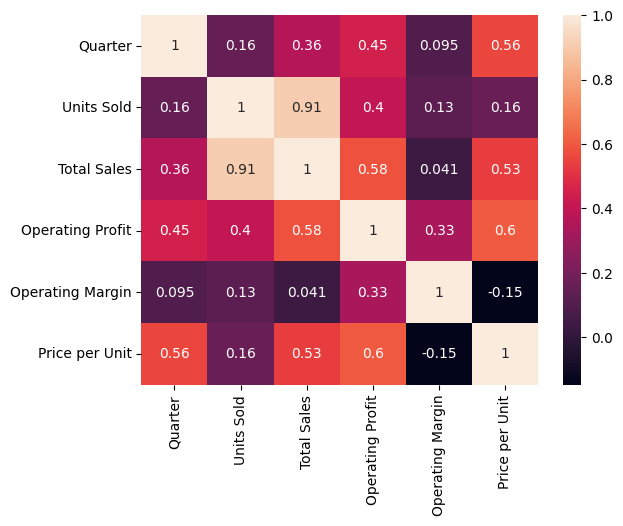

In [19]:
sns.heatmap(corr , annot=True)

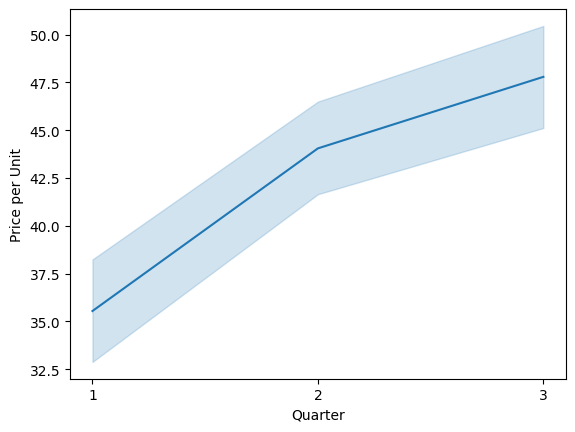

In [20]:
sns.lineplot(data=quarterly_data,x=quarterly_data['Quarter'] , y=quarterly_data['Price per Unit']);
plt.xticks(range(1,4,1));

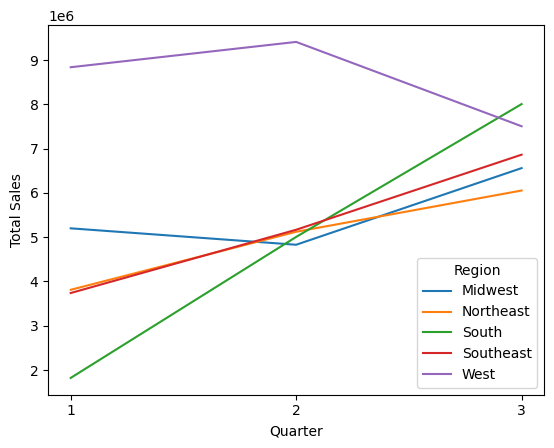

In [21]:
sns.lineplot(data=quarterly_data,x=quarterly_data['Quarter'] , y = quarterly_data['Total Sales'] , hue = quarterly_data['Region'] , errorbar=None);
plt.xticks(range(1,4,1));

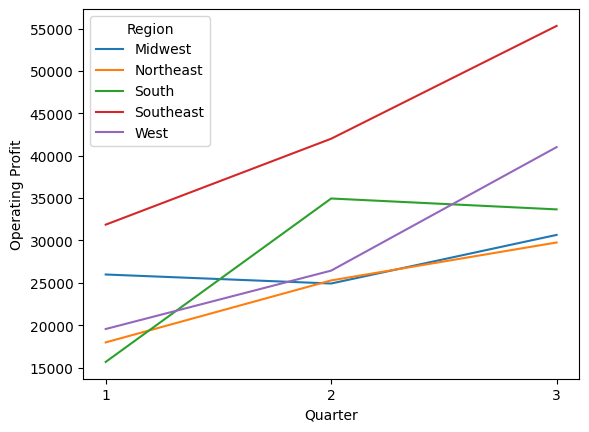

In [22]:
sns.lineplot(data=quarterly_data,x=quarterly_data['Quarter'],y=quarterly_data['Operating Profit'],hue = quarterly_data['Region'],errorbar=None)
plt.xticks(range(1,4,1));

<Axes: xlabel='Quarter', ylabel='Total Sales'>

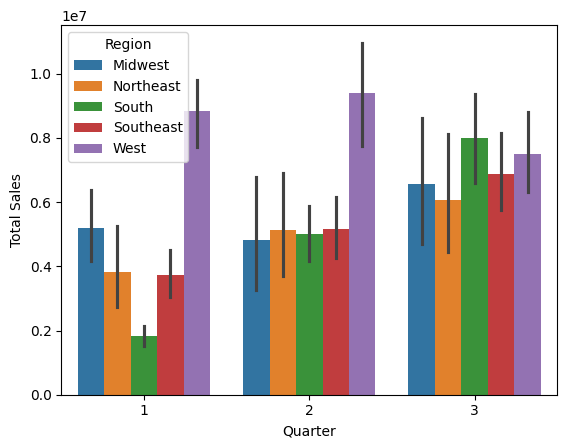

In [23]:
sns.barplot(x=quarterly_data['Quarter'] , y=quarterly_data['Total Sales'],hue = quarterly_data['Region'])

<Axes: xlabel='Quarter', ylabel='Operating Profit'>

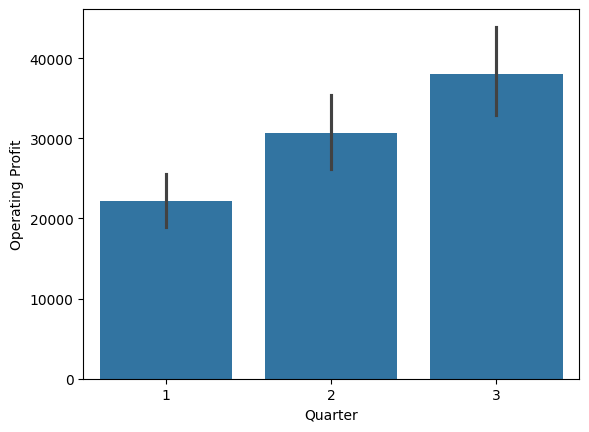

In [24]:
sns.barplot(x=quarterly_data['Quarter'] , y=quarterly_data['Operating Profit'])

<Axes: xlabel='Units Sold', ylabel='Operating Margin'>

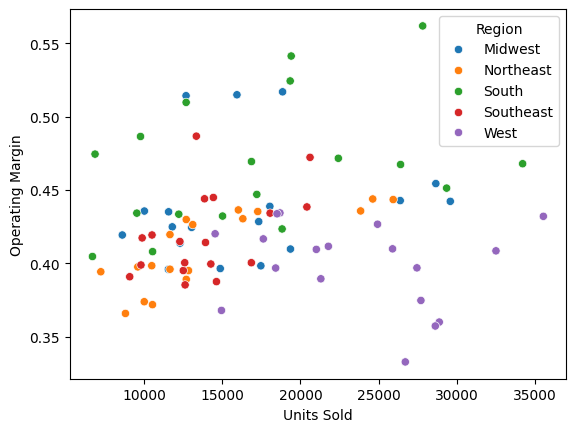

In [25]:
sns.scatterplot(data = quarterly_data , x = quarterly_data['Units Sold'] , y=quarterly_data['Operating Margin'] , hue = quarterly_data['Region'])

In [26]:
quarter = quarterly_data['Quarter']

In [27]:
quarterly_data

,Region,Product,Quarter,Units Sold,Total Sales,Operating Profit,Operating Margin,Price per Unit
0,Midwest,Men's Apparel,1,12681.0,4636224.0,28227.025641,0.514231,42.974359
1,Midwest,Men's Apparel,2,10015.0,4038129.0,20367.256410,0.435641,48.384615
2,Midwest,Men's Apparel,3,11565.0,4475269.0,22354.435897,0.435128,45.358974
4,Midwest,Men's Athletic Footwear,1,17465.0,5393675.0,22666.410256,0.398333,35.089744
5,Midwest,Men's Athletic Footwear,2,12296.0,3829706.0,19219.662162,0.413784,36.675676
...,...,...,...,...,...,...,...,...
113,West,Women's Athletic Footwear,2,21783.0,7058081.0,20734.989247,0.411613,42.193548
114,West,Women's Athletic Footwear,3,14540.0,5349217.0,29811.492063,0.420159,46.619048
116,West,Women's Street Footwear,1,27447.0,9210389.0,20649.193878,0.396939,42.979592
117,West,Women's Street Footwear,2,25888.0,8688075.0,24192.752688,0.409892,43.569892


In [28]:
quarterly_mapping = {
        1:'2021-03-31',
    2:'2021-06-30',
    3:'2021-09-30'
}

In [29]:
quarterly_data_combined  = quarterly_data.groupby(['Quarter']).agg({
    'Total Sales' : 'sum'
}).reset_index()
quarterly_data_combined

,Quarter,Total Sales
0,1,140476093.0
1,2,177240198.0
2,3,209979925.0


In [30]:
quarterly_data_combined['Quarter'] = quarterly_data_combined['Quarter'].map(quarterly_mapping)

In [31]:
quarterly_data_combined

,Quarter,Total Sales
0,2021-03-31,140476093.0
1,2021-06-30,177240198.0
2,2021-09-30,209979925.0


In [32]:
import prophet

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [33]:
op = prophet.Prophet()

In [34]:
quarterly_data_combined = quarterly_data_combined.rename(columns = {'Quarter':'ds','Total Sales':'y'})
quarterly_data_combined

,ds,y
0,2021-03-31,140476093.0
1,2021-06-30,177240198.0
2,2021-09-30,209979925.0


In [35]:
quarterly_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      3 non-null      object 
 1   y       3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes


In [36]:
quarterly_data_combined['ds'] = pd.to_datetime(quarterly_data_combined['ds'])
quarterly_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3 non-null      datetime64[ns]
 1   y       3 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 180.0 bytes


In [37]:
op.fit(quarterly_data_combined)

09:36:52 - cmdstanpy - INFO - Chain [1] start processing
09:36:54 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
forecast = op.make_future_dataframe(periods=3,freq='M')


In [39]:
forecast = op.predict(forecast)

Text(87.59722222222221, 0.5, 'Total Sales')

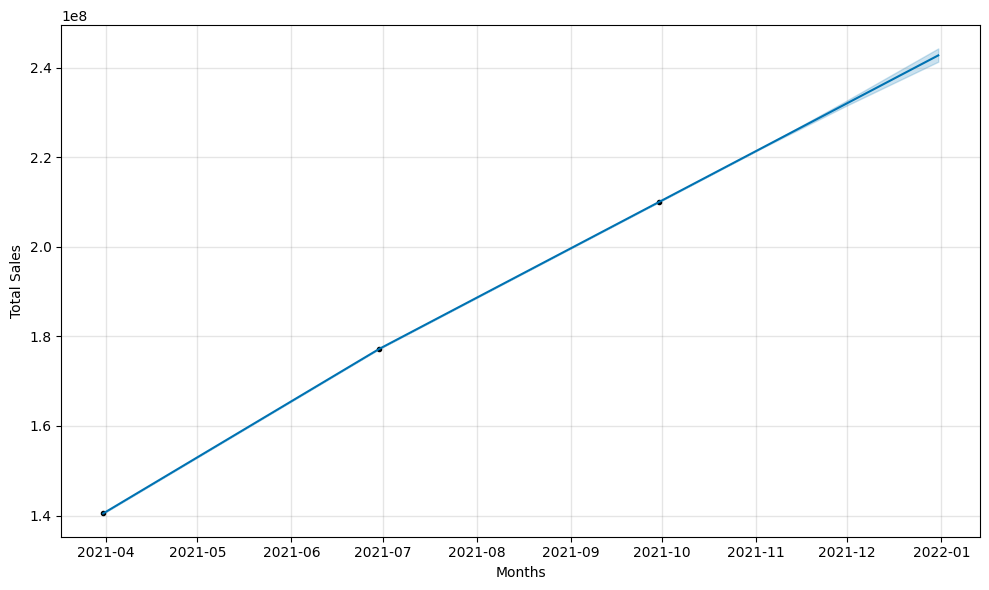

In [40]:
op.plot(forecast)
plt.xlabel('Months')
plt.ylabel('Total Sales')

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-31,1.404761e+08,1.404761e+08,1.404761e+08,1.404761e+08,1.404761e+08,0.0,0.0,0.0,0.0,0.0,0.0,1.404761e+08
1,2021-06-30,1.772403e+08,1.772403e+08,1.772403e+08,1.772403e+08,1.772403e+08,0.0,0.0,0.0,0.0,0.0,0.0,1.772403e+08
2,2021-09-30,2.099800e+08,2.099800e+08,2.099800e+08,2.099800e+08,2.099800e+08,0.0,0.0,0.0,0.0,0.0,0.0,2.099800e+08
3,2021-10-31,2.210119e+08,2.210119e+08,2.210119e+08,2.210119e+08,2.210119e+08,0.0,0.0,0.0,0.0,0.0,0.0,2.210119e+08
4,2021-11-30,2.316879e+08,2.312415e+08,2.323179e+08,2.312415e+08,2.323179e+08,0.0,0.0,0.0,0.0,0.0,0.0,2.316879e+08
5,2021-12-31,2.427198e+08,2.413113e+08,2.442778e+08,2.413113e+08,2.442778e+08,0.0,0.0,0.0,0.0,0.0,0.0,2.427198e+08


In [42]:
quarter_4_data

,Region,Product,Quarter,Units Sold,Total Sales,Operating Profit,Operating Margin,Price per Unit
3,Midwest,Men's Apparel,4,9131.0,4233435.0,29847.833333,0.445000,54.037037
7,Midwest,Men's Athletic Footwear,4,12557.0,4089428.0,27187.185185,0.414444,38.111111
11,Midwest,Men's Street Footwear,4,18396.0,7415562.0,53084.759259,0.432037,47.925926
15,Midwest,Women's Apparel,4,12882.0,6350257.0,53245.351852,0.495185,58.111111
19,Midwest,Women's Athletic Footwear,4,9409.0,3374992.0,22184.444444,0.401667,41.333333
23,Midwest,Women's Street Footwear,4,10111.0,3407324.0,21243.148148,0.392222,38.962963
27,Northeast,Men's Apparel,4,15669.0,7196046.0,18222.370370,0.363556,57.340741
31,Northeast,Men's Athletic Footwear,4,21533.0,8336018.0,23608.038462,0.416923,48.876923
35,Northeast,Men's Street Footwear,4,36420.0,15882952.0,41872.792308,0.474385,55.715385
39,Northeast,Women's Apparel,4,23734.0,11437700.0,33169.853846,0.418077,59.900000


In [43]:
value_sum = [sum(quarter_4_data['Total Sales'])]
predicted_value = [forecast.iloc[-1,1]]

print(value_sum,predicted_value)

[190125234.0] [242719777.81200108]


# Forecasting on daily basis

In [44]:
df.head()

,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Quarter
0,1128299.0,2021-01-01,West,California,San Francisco,Men's Athletic Footwear,65.0,750.0,487500.0,121875.0,0.25,Outlet,1
1,1128299.0,2021-01-02,West,California,San Francisco,Women's Street Footwear,65.0,750.0,487500.0,42875.0,0.40,Outlet,1
2,1128299.0,2021-01-03,West,California,San Francisco,Women's Athletic Footwear,60.0,650.0,390000.0,42875.0,0.35,Outlet,1
3,1128299.0,2021-01-04,West,California,San Francisco,Men's Apparel,65.0,550.0,357500.0,42875.0,0.55,Outlet,1
4,1128299.0,2021-01-05,West,California,San Francisco,Women's Apparel,80.0,725.0,580000.0,42875.0,0.20,Outlet,1


In [45]:
daily_based_data = df.groupby(['Invoice Date','Quarter']).agg({
    'Total Sales':'sum'
}).reset_index()

In [46]:
daily_based_data

,Invoice Date,Quarter,Total Sales
0,2021-01-01,1,654902.0
1,2021-01-02,1,730614.0
2,2021-01-03,1,1030039.0
3,2021-01-04,1,572074.0
4,2021-01-05,1,1803002.0
...,...,...,...
360,2021-12-27,4,602353.0
361,2021-12-28,4,301010.0
362,2021-12-29,4,211109.0
363,2021-12-30,4,167903.0


In [47]:
daily_based_data_train = daily_based_data[daily_based_data['Quarter'] <= 3]
daily_based_data_train

,Invoice Date,Quarter,Total Sales
0,2021-01-01,1,654902.0
1,2021-01-02,1,730614.0
2,2021-01-03,1,1030039.0
3,2021-01-04,1,572074.0
4,2021-01-05,1,1803002.0
...,...,...,...
268,2021-09-26,3,477272.0
269,2021-09-27,3,2359355.0
270,2021-09-28,3,511731.0
271,2021-09-29,3,587438.0


In [48]:
train = daily_based_data_train[['Invoice Date','Total Sales']]
train

,Invoice Date,Total Sales
0,2021-01-01,654902.0
1,2021-01-02,730614.0
2,2021-01-03,1030039.0
3,2021-01-04,572074.0
4,2021-01-05,1803002.0
...,...,...
268,2021-09-26,477272.0
269,2021-09-27,2359355.0
270,2021-09-28,511731.0
271,2021-09-29,587438.0


In [49]:
train = train.rename(columns={'Invoice Date':'ds','Total Sales':'y'})

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 0 to 272
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      273 non-null    datetime64[ns]
 1   y       273 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 KB


In [51]:
test = daily_based_data[daily_based_data['Quarter'] == 4]

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 273 to 364
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Invoice Date  92 non-null     datetime64[ns]
 1   Quarter       92 non-null     int32         
 2   Total Sales   92 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 2.5 KB


In [53]:
from prophet import Prophet
model = Prophet()

In [54]:
model.fit(train)

09:36:55 - cmdstanpy - INFO - Chain [1] start processing
09:36:55 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
forecast = model.make_future_dataframe(periods=92 , freq='D')

In [56]:
forecast = model.predict(forecast)

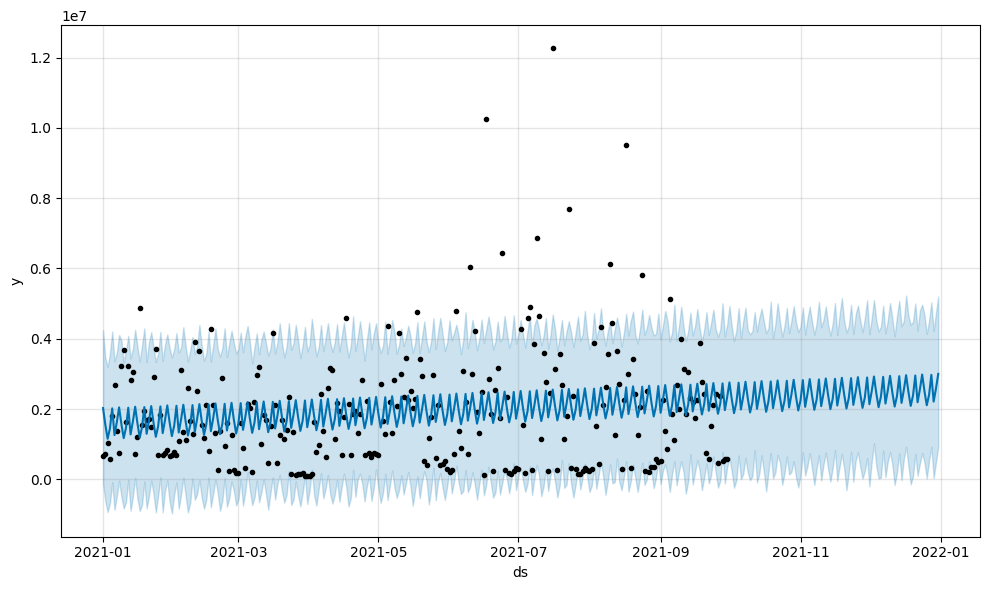

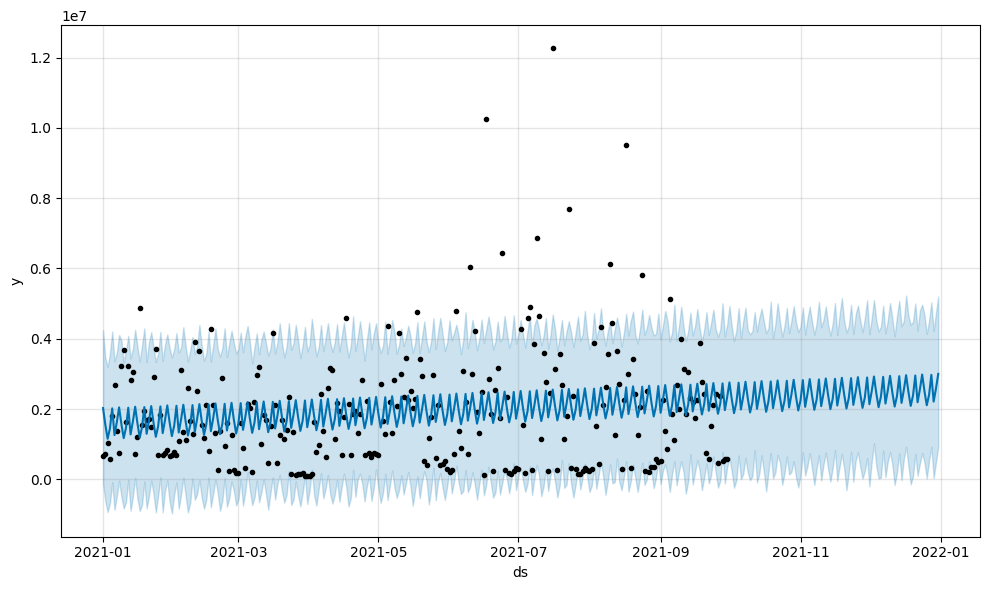

In [57]:
model.plot(forecast)

In [58]:
predicted_sum = sum(forecast[-92:]['trend'])

In [59]:
actual_sum = sum(test['Total Sales'])

In [60]:
print(f'{predicted_sum:.2f},{actual_sum}')

223290874.55,190125234.0


In [68]:
print(f'{(predicted_sum-actual_sum)/(predicted_sum)*100:.2f}%')

14.85%
